In [ ]:
import psycopg2
import pandas as pd
import pandas.io.sql as psql
import numpy as np
import matplotlib.pyplot as plt

pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

/usr/local/lib/python3.7/dist-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


In [ ]:
#establishing the connection
conn = psycopg2.connect(
   database="pdm", user='postgres', password='angryzebra', host='18.180.207.243', port= '5432'
)

# Understanding SAP

In [ ]:
data_sap = psql.read_sql('SELECT * FROM sap_raw', conn)

# Understanding maintenance_hist

In [ ]:
data_maint_201510_201801 = psql.read_sql('SELECT * FROM maintenance_hist_201510_to_201801', conn)
data_maint_201802_201807 = psql.read_sql('SELECT * FROM maintenance_hist_201802_to_201807', conn)
data_maint_201808_201810 = psql.read_sql('SELECT * FROM maintenance_hist_201808_to_201810', conn)

In [ ]:
data_maintenance = pd.concat([data_maint_201510_201801,data_maint_201802_201807,data_maint_201808_201810])

In [ ]:
data_maintenance = data_maintenance.reset_index(drop=True)
data_maintenance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168022 entries, 0 to 168021
Data columns (total 64 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   functional_location                168022 non-null  object
 1   class                              166602 non-null  object
 2   model                              165114 non-null  object
 3   shift_date                         168022 non-null  object
 4   shift_type                         168022 non-null  object
 5   notification                       168022 non-null  object
 6   work_order                         104824 non-null  object
 7   hour_meter                         149849 non-null  object
 8   notification_description           168022 non-null  object
 9   repair                             162528 non-null  object
 10  planning_indicator_description     168022 non-null  object
 11  malfunction_start_notif            168022 non-null  

In [ ]:
data_sap.rename(columns={"end_down_datetime": "end_down_date_and_time",
                         "malfunction_startnotif": "malfunction_start_notif",
                         "start_down_datetime": "start_down_date_and_time"},
                inplace=True)

In [ ]:
comp_maintenance = pd.concat([data_maintenance, data_sap])
comp_maintenance.reset_index(drop=True, inplace=True)

In [ ]:
comp_maintenance['planning_indicator_description'].unique()

array(['Unplanned Order', 'Planned Order', 'Immediate Order'],
      dtype=object)

## Adding unit_no feature

In [ ]:
comp_maintenance['unit_no']=comp_maintenance['functional_location'].str.slice(2,10)
comp_maintenance.head()

,functional_location,class,model,shift_date,shift_type,notification,work_order,hour_meter,notification_description,repair,planning_indicator_description,malfunction_start_notif,start_down_date_and_time,end_down_date_and_time,total_breakdown_hours,no_of_stoppage,elapsed_day,delays,delay_hours,opportunity,opportunity_hours,status,breakdown_duration_hr,action_taken_code,activity_code_delays,activity_code_group_delays,activity_code_group_opportunity,activity_code_opportunity,activity_code_text_delays,activity_code_text_opportunity,planning_indicator,caused_group_code,caused_group_code_description,action_taken_code_desc,caused_group_subcode,caused_group_subcode_description,code_group_activities_delays,code_group_activities_opportunity,component,component_description,criticality,damage_code,damage_description,damage_group_code,damage_group_code_description,duration_hr,estimated_completion_date,functional_location_status,issue,location,manufacturer,notif_type,person_responsible,planning_plant,pmact_type,pmact_type_description,priority,subcomponent,subcomponent_description,technical_insp_by,technical_insp_on,value_delays_duration,value_opportunity_duration,wo_type,unit_no
0,16EX2321,EXCAVATOR,None,9/1/17,Night Shift,1690236338,None,"10,454.0",Engine Can't Start,Jamper Battery,Unplanned Order,01-Sep-2017 19:05,01-Sep-2017 19:05,01-Sep-2017 19:50,0.75,1,0,None,None,None,None,ATCO NOCO,0.75,0012,None,None,None,None,None,None,None,None,None,REPAIRED,None,None,None,None,1400EX,ELECTRIC SYSTEM,1,0004,NO POWER / VOLTAGE,EC-ELC01,GENERAL,00.75,9/2/17,USE,None,KJA,HITACHI,D2,None,1608,D14,Minor Repair,2,1401,BATTERIES,TETTY TABIAN,9/1/17,0.00,0.00,None,EX2321
1,16MT0155,MEDIUM TRUCK,AD240T38W,9/1/17,Night Shift,1690235893,1610172199,"27,572.3",Box Fuel Broken,Repair BoX Fuel by Welder,Unplanned Order,30-Aug-2017 13:44,01-Sep-2017 18:00,02-Sep-2017 06:00,0,0,3,PARTS - SPARE PART,12.00,None,None,ATCO NOCO ORAS,12.00,0012,6100,DELAYS MAINTENANCE,None,None,PARTS - SPARE PART,None,None,C5-PRD04,DESIGN DEFICIENT,REPAIRED,0019,NORMAL MECHANICAL FAIL,DA-DLY02,None,7050,"MACHINE FRAME, STRUCTURE, BODY & CAB",2,0006,LOOSENESS,MC-MEC01,GENERAL,12.00,8/31/17,USE,None,KJA,IVECO,D2,None,1608,D14,Minor Repair,2,7050,"MACHINE FRAME, STRUCTURE, BODY & CAB",AGUS W,9/4/17,0,0,WD02,MT0155
2,16DT0750,TRUCK,777D,9/1/17,Night Shift,1690233107,1610170311,"26,246.7",PMS 250 - 26250 HRS - A,PMS 250 - 26250 HRS - A,Planned Order,01-Sep-2017 21:25,01-Sep-2017 21:25,02-Sep-2017 00:15,2.83,1,1,None,None,None,None,ATCO NOCO ORAS,2.83,0023,None,None,None,None,None,None,1,C5-HUM02,ATTITUDE / BEHAVIOUR,SERVICED / LUBRIFIED,0010,PREVENTIVE MAINTENANCE,None,None,7500DT,MAINTENANCE,1,0001,GENERAL,MC-MEC01,GENERAL,02.83,8/20/17,USE,None,KJA,CATERPILLAR,D1,None,1608,D01,OPEX-PMS,2,7500,PM SERVICE,TETTY TABIAN,9/2/17,0.00,0.00,WD01,DT0750
3,16DT0743,TRUCK,HD785-7,9/1/17,Night Shift,1690236337,None,"20,239.2",Handrail LH/RH Loose,Repair Handrail LH/RH,Unplanned Order,01-Sep-2017 19:56,01-Sep-2017 19:56,01-Sep-2017 21:20,1.40,1,0,None,None,None,None,ATCO NOCO,1.40,0012,None,None,None,None,None,None,None,None,None,REPAIRED,None,None,None,None,7050DT,"MACHINE FRAME, STRUCTURE, BODY & CAB",1,0006,LOOSENESS,MC-MEC01,GENERAL,01.40,9/2/17,USE,None,KJA,KOMATSU,D2,None,1608,D14,Minor Repair,2,7256,HANDRAIL,AGUS WAHYUDI,9/1/17,0.00,0.00,None,DT0743
4,16DT0564,TRUCK,777D,9/1/17,Day Shift,1690159736,None,"29,269.6",Repair Cross Member RH Crack,None,Planned Order,01-Sep-2017 12:00,01-Sep-2017 12:00,01-Sep-2017 13:00,0,0,0,None,None,IDLE MACHINE,1.00,ATCO NOCO,1.00,0006,None,None,OPPORTUNITY MAINTENANCE,0010,None,IDLE MACHINE,1,None,None,INSPECTED/CHECKED/TESTED,None,None,None,OA-OPP02,7050DT,"MACHINE FRAME, STRUCTURE, BODY & CAB",1,0001,GENERAL,SC-STR01,GENERAL,01.00,9/1/17,USE,None,KJA,CATERPILLAR,D3,None,1608,D09,Inspection,None,7051,FRAME & CHASSIS,AGUS WAHYUDI,9/1/17,0.00,1.00,None,DT0564


In [ ]:
comp_maintenance['start_down_date_and_time']=pd.to_datetime(comp_maintenance['start_down_date_and_time'])

In [ ]:
comp_maintenance['start_down_date_and_time'] = comp_maintenance['start_down_date_and_time'].apply(lambda t: t.strftime('%Y-%m-%d %H'))

In [ ]:
comp_maintenance['start_down_date_and_time']=pd.to_datetime(comp_maintenance['start_down_date_and_time'],format="%Y-%m-%d %H")

## VIMS

In [ ]:
vims1 = psql.read_sql('SELECT * FROM vims_1', conn)
vims1.head()

,unit,date,air_fltr_engine_loaded_max_kpa,amb_air_temp_engine_loaded_avg_degc,boost_pres_engine_loaded_avg_kpa,brk_temp_braking_avg_degc,cycle_p_fela_good_trigger_avg_,cycle_r_fela_good_trigger_avg_,eng_cool_temp_engine_running_avg_degc,eng_oil_fltr_high_rpm_and_cool_higher_70_max_kpa,eng_oil_pres_engine_high_and_cool_higher_74_avg_kpa,eng_oil_pres_engine_low_and_cool_higher_74_avg_kpa,lt_exh_temp_engine_loaded_max_degc,lt_f_susp_cyl_traveling_loaded_avg_kpa,lt_r_susp_cyl_traveling_loaded_avg_kpa,r_aftrclr_temp_engine_loaded_max_degc,rt_exh_temp_engine_loaded_max_degc,rt_f_susp_cyl_traveling_loaded_avg_kpa,rt_r_susp_cyl_traveling_loaded_avg_kpa,rtf_ltf_suspcyl_traveling_empty_avg_kpa,rtf_ltf_suspcyl_traveling_loaded_avg_kpa,rt_lt_exh_temp_engine_loaded_avg_degc,rtr_ltr_suspcyl_traveling_empty_avg_kpa,rtr_ltr_suspcyl_traveling_loaded_avg_kpa,tkph_f_tires_no_condition_max_t_per_kph,tkph_r_tires_no_condition_max_t_per_kph
0,DT0764,10/6/2015 9:42:06AM,4,31.3,197,77,FMI-19,FMI-19,81,31,469,296,579,5067,10903,67,576,4100,9515,-463,-966,-1,-76,-1388,0,0
1,DT0764,10/6/2015 11:09:12AM,4,33.4,193.5,85,FMI-19,FMI-19,84,31,465,269,585,4691,9992,68,584,3885,9332,-447,-805,0,-22,-659,0,0
2,DT0764,10/6/2015 7:34:45PM,4,27.1,203,76,FMI-19,FMI-19,79,31,473.5,286.5,562,4536,9856,63,562,4073,10715,-423,-463,-1,-119,859,0,0
3,DT0764,10/6/2015 8:40:20PM,4,26.8,202,82,FMI-19,FMI-19,83,32,466,274,565,4869,11380,62,563,3793,9974,-382,-1076,0,-74,-1406,0,0
4,DT0764,10/6/2015 9:40:20PM,4,26.6,201,83,FMI-19,FMI-19,83,32,465,274.5,562,4871,11386,62,561,3679,9359,-516,-1192,-1,-101,-2026,0,0


In [ ]:
vims1 = vims1.rename(columns={'unit':'unit_no'})

In [ ]:
vims1['date']=pd.to_datetime(vims1['date'])

In [ ]:
vims1['date'] = vims1['date'].apply(lambda t: t.strftime('%Y-%m-%d %H'))

In [ ]:
vims1['date']=pd.to_datetime(vims1['date'],format="%Y-%m-%d %H")

## Maintenance_VIMS Join

In [ ]:
comp_maintenance2 = comp_maintenance.copy()
comp_maintenance2 = comp_maintenance2.rename(columns={'start_down_date_and_time':'date'})

In [ ]:
vims_join1 = pd.merge(vims1,comp_maintenance2,how='left',on=["unit_no","date"])

**Final Dataset**

In [ ]:
vims_maintenance = vims_join1.copy()

In [ ]:
vims_maintenance.groupby('planning_indicator_description').count()

,unit_no,date,air_fltr_engine_loaded_max_kpa,amb_air_temp_engine_loaded_avg_degc,boost_pres_engine_loaded_avg_kpa,brk_temp_braking_avg_degc,cycle_p_fela_good_trigger_avg_,cycle_r_fela_good_trigger_avg_,eng_cool_temp_engine_running_avg_degc,eng_oil_fltr_high_rpm_and_cool_higher_70_max_kpa,eng_oil_pres_engine_high_and_cool_higher_74_avg_kpa,eng_oil_pres_engine_low_and_cool_higher_74_avg_kpa,lt_exh_temp_engine_loaded_max_degc,lt_f_susp_cyl_traveling_loaded_avg_kpa,lt_r_susp_cyl_traveling_loaded_avg_kpa,r_aftrclr_temp_engine_loaded_max_degc,rt_exh_temp_engine_loaded_max_degc,rt_f_susp_cyl_traveling_loaded_avg_kpa,rt_r_susp_cyl_traveling_loaded_avg_kpa,rtf_ltf_suspcyl_traveling_empty_avg_kpa,rtf_ltf_suspcyl_traveling_loaded_avg_kpa,rt_lt_exh_temp_engine_loaded_avg_degc,rtr_ltr_suspcyl_traveling_empty_avg_kpa,rtr_ltr_suspcyl_traveling_loaded_avg_kpa,tkph_f_tires_no_condition_max_t_per_kph,tkph_r_tires_no_condition_max_t_per_kph,functional_location,class,model,shift_date,shift_type,notification,work_order,hour_meter,notification_description,repair,malfunction_start_notif,end_down_date_and_time,total_breakdown_hours,no_of_stoppage,elapsed_day,delays,delay_hours,opportunity,opportunity_hours,status,breakdown_duration_hr,action_taken_code,activity_code_delays,activity_code_group_delays,activity_code_group_opportunity,activity_code_opportunity,activity_code_text_delays,activity_code_text_opportunity,planning_indicator,caused_group_code,caused_group_code_description,action_taken_code_desc,caused_group_subcode,caused_group_subcode_description,code_group_activities_delays,code_group_activities_opportunity,component,component_description,criticality,damage_code,damage_description,damage_group_code,damage_group_code_description,duration_hr,estimated_completion_date,functional_location_status,issue,location,manufacturer,notif_type,person_responsible,planning_plant,pmact_type,pmact_type_description,priority,subcomponent,subcomponent_description,technical_insp_by,technical_insp_on,value_delays_duration,value_opportunity_duration,wo_type
planning_indicator_description,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Planned Order,684,684,684,684,684,684,684,684,684,684,684,684,684,684,684,684,684,684,684,684,684,684,684,684,684,684,684,684,684,684,684,684,236,670,684,683,684,684,684,684,684,24,24,295,295,684,684,651,24,24,275,275,24,275,652,228,228,651,228,228,24,275,652,652,652,652,652,652,652,652,622,652,0,652,652,652,69,652,652,652,641,652,644,649,649,652,652,228
Unplanned Order,572,572,572,572,572,572,572,572,572,572,572,572,572,572,572,572,572,572,572,572,572,572,572,572,572,572,572,572,572,572,572,572,130,571,572,572,572,572,572,572,572,18,18,133,133,572,572,552,18,18,116,116,18,116,0,119,119,552,119,119,18,116,552,552,552,552,552,552,552,552,550,552,0,552,552,552,11,552,549,549,551,552,547,552,551,552,552,119


In [ ]:
vims_maintenance.groupby(['caused_group_subcode_description','action_taken_code_desc']).count()

unit_no  \
caused_group_subcode_description action_taken_code_desc                    
GENERAL                          ADJUSTED/ALIGNED/CALIBRATED           1   
                                 INSPECTED/CHECKED/TESTED              2   
NORMAL ELECTRICAL FAIL           DRAINED/DISCHARGED/FILLED             1   
                                 INSPECTED/CHECKED/TESTED              1   
                                 REPAIRED                              3   
                                 REPLACED WITH NEW ITEM               52   
                                 RESET / RESTORED POWER                1   
                                 SWAPPED / CANIBALED                   1   
NORMAL MECHANICAL FAIL           ADJUSTED/ALIGNED/CALIBRATED           5   
                                 DRAINED/DISCHARGED/FILLED             1   
                                 INSPECTED/CHECKED/TESTED             26   
                                 REPAIRED                             16   
                                 REPLACED WITH NEW ITEM               64   
                                 REPLACED WITH PART EXCHANGE           1   
                                 REPLACED WITH RECONDITION ITEM        2   
                                 REPLACED WITH USED ITEM               1   
                                 RESEALED / REBEARING                  5   
                                 SERVICED / LUBRIFIED                  4   
NORMAL WEAR                      DRAINED/DISCHARGED/FILLED             5   
                                 INSPECTED/CHECKED/TESTED             11   
                                 REPAIRED                              1   
                                 REPLACED WITH NEW ITEM               14   
                                 RESEALED / REBEARING                  1   
                                 SWAPPED / CANIBALED                   1   
OPERATOR ERROR                   REPAIRED                              6   
PLANNED REPAIR                   INSPECTED/CHECKED/TESTED              2   
                                 REPAIRED                             10   
                                 REPLACED WITH NEW ITEM               24   
                                 RESEALED / REBEARING                  7   
                                 RETORQUED                             2   
PREVENTIVE MAINTENANCE           INSPECTED/CHECKED/TESTED              2   
                                 REPLACED WITH NEW ITEM               10   
                                 REPLACED WITH PART EXCHANGE           2   
                                 REPLACED WITH RECONDITION ITEM        4   
                                 REPLACED WITH REMANUFACTURE           6   
                                 SERVICED / LUBRIFIED                 28   
                                 SWAPPED / CANIBALED                   7   
ROAD / PIT CONDITIONS            ADJUSTED/ALIGNED/CALIBRATED           1   
                                 REPLACED WITH NEW ITEM                4   
                                 RESEALED / REBEARING                  1   
WRONG MATERIALS                  SWAPPED / CANIBALED                   2   
WRONG OPERATION                  REPLACED WITH NEW ITEM                9   

                                                                 date  \
caused_group_subcode_description action_taken_code_desc                 
GENERAL                          ADJUSTED/ALIGNED/CALIBRATED        1   
                                 INSPECTED/CHECKED/TESTED           2   
NORMAL ELECTRICAL FAIL           DRAINED/DISCHARGED/FILLED          1   
                                 INSPECTED/CHECKED/TESTED           1   
                                 REPAIRED                           3   
                                 REPLACED WITH NEW ITEM            52   
                                 RESET / RESTORED POWER             1   
                                 SWAPPED / CANIBALED           

In [ ]:
to_drop = ['shift_type','notification','notification_description','malfunction_start_notif','no_of_stoppage','opportunity','opportunity_hours',
           'activity_code_group_opportunity','activity_code_opportunity','activity_code_text_delays','activity_code_text_opportunity','code_group_activities_delays',
           'code_group_activities_opportunity','issue','notif_type','person_responsible','planning_plant','technical_insp_by','technical_insp_on']

In [ ]:
vims_maintenance = vims_maintenance.drop(to_drop,axis=1)

###########################################################################################

## VIMS

In [ ]:
vims_maintenance.head()

,unit_no,date,air_fltr_engine_loaded_max_kpa,amb_air_temp_engine_loaded_avg_degc,boost_pres_engine_loaded_avg_kpa,brk_temp_braking_avg_degc,cycle_p_fela_good_trigger_avg_,cycle_r_fela_good_trigger_avg_,eng_cool_temp_engine_running_avg_degc,eng_oil_fltr_high_rpm_and_cool_higher_70_max_kpa,eng_oil_pres_engine_high_and_cool_higher_74_avg_kpa,eng_oil_pres_engine_low_and_cool_higher_74_avg_kpa,lt_exh_temp_engine_loaded_max_degc,lt_f_susp_cyl_traveling_loaded_avg_kpa,lt_r_susp_cyl_traveling_loaded_avg_kpa,r_aftrclr_temp_engine_loaded_max_degc,rt_exh_temp_engine_loaded_max_degc,rt_f_susp_cyl_traveling_loaded_avg_kpa,rt_r_susp_cyl_traveling_loaded_avg_kpa,rtf_ltf_suspcyl_traveling_empty_avg_kpa,rtf_ltf_suspcyl_traveling_loaded_avg_kpa,rt_lt_exh_temp_engine_loaded_avg_degc,rtr_ltr_suspcyl_traveling_empty_avg_kpa,rtr_ltr_suspcyl_traveling_loaded_avg_kpa,tkph_f_tires_no_condition_max_t_per_kph,tkph_r_tires_no_condition_max_t_per_kph,functional_location,class,model,shift_date,work_order,hour_meter,repair,planning_indicator_description,end_down_date_and_time,total_breakdown_hours,elapsed_day,delays,delay_hours,status,breakdown_duration_hr,action_taken_code,activity_code_delays,activity_code_group_delays,planning_indicator,caused_group_code,caused_group_code_description,action_taken_code_desc,caused_group_subcode,caused_group_subcode_description,component,component_description,criticality,damage_code,damage_description,damage_group_code,damage_group_code_description,duration_hr,estimated_completion_date,functional_location_status,location,manufacturer,pmact_type,pmact_type_description,priority,subcomponent,subcomponent_description,value_delays_duration,value_opportunity_duration,wo_type
0,DT0764,2015-10-06 09:00:00,4,31.3,197,77,FMI-19,FMI-19,81,31,469,296,579,5067,10903,67,576,4100,9515,-463,-966,-1,-76,-1388,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,DT0764,2015-10-06 11:00:00,4,33.4,193.5,85,FMI-19,FMI-19,84,31,465,269,585,4691,9992,68,584,3885,9332,-447,-805,0,-22,-659,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,DT0764,2015-10-06 19:00:00,4,27.1,203,76,FMI-19,FMI-19,79,31,473.5,286.5,562,4536,9856,63,562,4073,10715,-423,-463,-1,-119,859,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,DT0764,2015-10-06 20:00:00,4,26.8,202,82,FMI-19,FMI-19,83,32,466,274,565,4869,11380,62,563,3793,9974,-382,-1076,0,-74,-1406,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,DT0764,2015-10-06 21:00:00,4,26.6,201,83,FMI-19,FMI-19,83,32,465,274.5,562,4871,11386,62,561,3679,9359,-516,-1192,-1,-101,-2026,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Labelling Target

In [ ]:
def label_vims(cond1, cond2):
  if (cond1 in ['NORMAL MECHANICAL FAIL', 'NORMAL ELECTRICAL FAIL']):
    return 1
  elif (cond1 in ['PREVENTIVE MAINTENANCE']):
    return 0
  elif (cond1 not in ['NORMAL MECHANICAL FAIL', 'NORMAL ELECTRICAL FAIL','PREVENTIVE MAINTENANCE']) & (cond2 == 'Unplanned Order'):
    return 1
  else:
    return 0


In [ ]:
vims_maintenance['failure_status']=vims_maintenance[['caused_group_subcode_description', 'planning_indicator_description']].apply(lambda x: label_vims(x.caused_group_subcode_description,
                                                                                                                                                       x.planning_indicator_description), 
                                                                                                                                                       axis=1)

## Failure Distribution

In [ ]:
vims_maintenance['year']= pd.DatetimeIndex(vims_maintenance['date']).year
vims_maintenance['month']= pd.DatetimeIndex(vims_maintenance['date']).month
vims_maintenance['week'] = vims_maintenance['date'].apply(lambda d: (d.day-1) // 7 + 1)

## Data Type Formatting

In [ ]:
sensor_cols = list(vims1.columns)

In [ ]:
sensor_cols

['unit_no',
 'date',
 'air_fltr_engine_loaded_max_kpa',
 'amb_air_temp_engine_loaded_avg_degc',
 'boost_pres_engine_loaded_avg_kpa',
 'brk_temp_braking_avg_degc',
 'cycle_p_fela_good_trigger_avg_',
 'cycle_r_fela_good_trigger_avg_',
 'eng_cool_temp_engine_running_avg_degc',
 'eng_oil_fltr_high_rpm_and_cool_higher_70_max_kpa',
 'eng_oil_pres_engine_high_and_cool_higher_74_avg_kpa',
 'eng_oil_pres_engine_low_and_cool_higher_74_avg_kpa',
 'lt_exh_temp_engine_loaded_max_degc',
 'lt_f_susp_cyl_traveling_loaded_avg_kpa',
 'lt_r_susp_cyl_traveling_loaded_avg_kpa',
 'r_aftrclr_temp_engine_loaded_max_degc',
 'rt_exh_temp_engine_loaded_max_degc',
 'rt_f_susp_cyl_traveling_loaded_avg_kpa',
 'rt_r_susp_cyl_traveling_loaded_avg_kpa',
 'rtf_ltf_suspcyl_traveling_empty_avg_kpa',
 'rtf_ltf_suspcyl_traveling_loaded_avg_kpa',
 'rt_lt_exh_temp_engine_loaded_avg_degc',
 'rtr_ltr_suspcyl_traveling_empty_avg_kpa',
 'rtr_ltr_suspcyl_traveling_loaded_avg_kpa',
 'tkph_f_tires_no_condition_max_t_per_kph',
 'tkp

In [ ]:
sensor_cols.remove('unit_no')
sensor_cols.remove('date')

In [ ]:
for column in vims_maintenance.columns:
  if column not in ['date', 'failure_status','year','month','week'] :
      vims_maintenance.loc[vims_maintenance[column].str.contains('FMI', regex=True, na=False),column] = np.nan

In [ ]:
vims_maintenance[sensor_cols] = vims_maintenance[sensor_cols].astype('float')

In [ ]:
vims_maintenance['hour_meter'] = vims_maintenance['hour_meter'].str.replace(',','')

In [ ]:
vims_maintenance['hour_meter'] = vims_maintenance['hour_meter'].astype('float')

In [ ]:
fill_missing_dat = vims_maintenance.copy()

In [ ]:
for unit in fill_missing_dat['unit_no'].unique():
  fill_missing_dat.loc[fill_missing_dat['unit_no']==unit, 'hour_meter'] = fill_missing_dat.loc[fill_missing_dat['unit_no']==unit, 'hour_meter'].interpolate()

DT0764


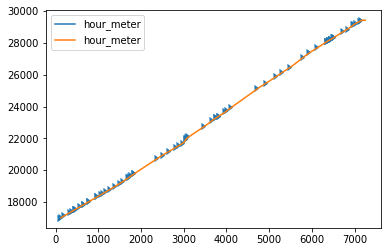

DT0765


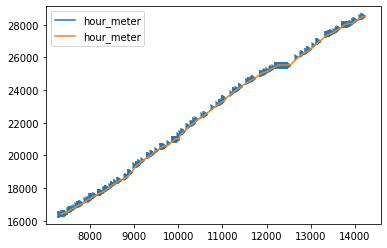

DT0767


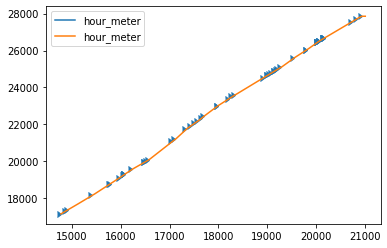

DT0766


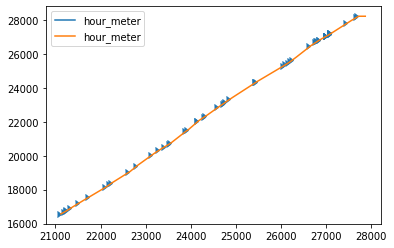

DT0713


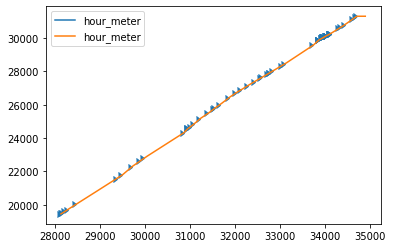

DT0714


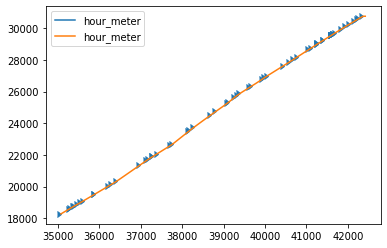

DT0715


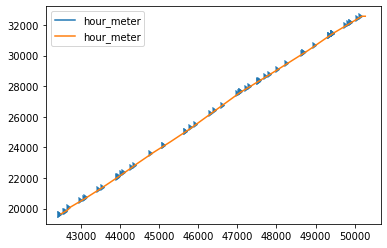

DT0716


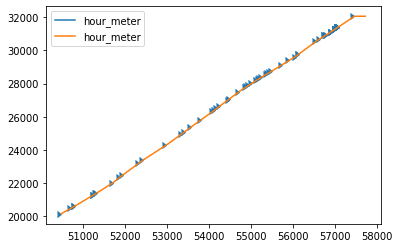

DT0717


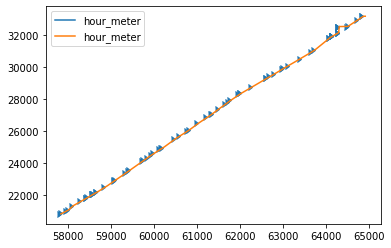

DT0718


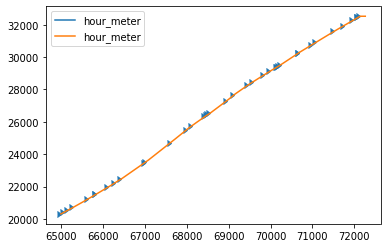

DT0762


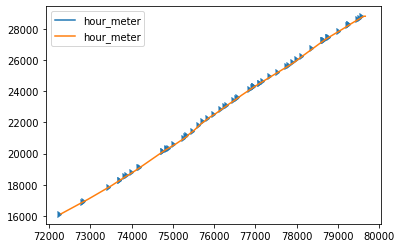

DT0763


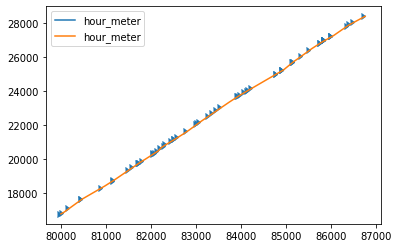

DT0709


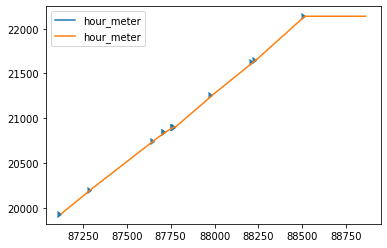

DT0710


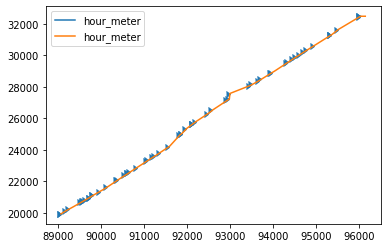

DT0711


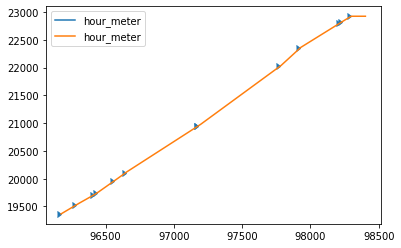

DT0712


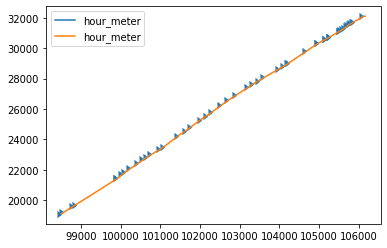

In [ ]:
for unit in fill_missing_dat['unit_no'].unique():
  print(unit)
  fig,ax = plt.subplots()
  temp = fill_missing_dat.loc[fill_missing_dat['unit_no']==unit, ['hour_meter']]
  temp2 = vims_maintenance.loc[vims_maintenance['unit_no']==unit, ['hour_meter']]
  temp2.plot(marker=5, ax=ax)
  temp.plot(ax=ax)
  plt.show()

In [ ]:
vims_agg = fill_missing_dat.copy()

In [ ]:
group_data_sensor = vims_agg.drop_duplicates(subset=['unit_no','date'])

## **New Approach for labeling**

In [ ]:
new_group_data_sensor = group_data_sensor.copy()

In [ ]:
new_group_data_sensor['new_hour_meter'] = group_data_sensor.groupby('unit_no')['date'].rank(method='first', ascending=True)

In [ ]:
fail_position = group_data_sensor.loc[group_data_sensor['failure_status']==1,['unit_no','hour_meter','failure_status','year','month','week']][['unit_no','hour_meter']].values

In [ ]:
sensor_cols = list(vims1.columns)

In [ ]:
sensor_cols.remove('cycle_p_fela_good_trigger_avg_')
sensor_cols.remove('cycle_r_fela_good_trigger_avg_')
sensor_cols = sensor_cols + ['hour_meter','failure_status']

In [ ]:
sensor_cols[0] = 'unit_no'

In [ ]:
vims_new_dataset = new_group_data_sensor[sensor_cols+['new_hour_meter']]

In [ ]:
vims_new_dataset.reset_index(drop=True, inplace=True)

In [ ]:
vims_new_dataset.head()

,unit_no,date,air_fltr_engine_loaded_max_kpa,amb_air_temp_engine_loaded_avg_degc,boost_pres_engine_loaded_avg_kpa,brk_temp_braking_avg_degc,eng_cool_temp_engine_running_avg_degc,eng_oil_fltr_high_rpm_and_cool_higher_70_max_kpa,eng_oil_pres_engine_high_and_cool_higher_74_avg_kpa,eng_oil_pres_engine_low_and_cool_higher_74_avg_kpa,lt_exh_temp_engine_loaded_max_degc,lt_f_susp_cyl_traveling_loaded_avg_kpa,lt_r_susp_cyl_traveling_loaded_avg_kpa,r_aftrclr_temp_engine_loaded_max_degc,rt_exh_temp_engine_loaded_max_degc,rt_f_susp_cyl_traveling_loaded_avg_kpa,rt_r_susp_cyl_traveling_loaded_avg_kpa,rtf_ltf_suspcyl_traveling_empty_avg_kpa,rtf_ltf_suspcyl_traveling_loaded_avg_kpa,rt_lt_exh_temp_engine_loaded_avg_degc,rtr_ltr_suspcyl_traveling_empty_avg_kpa,rtr_ltr_suspcyl_traveling_loaded_avg_kpa,tkph_f_tires_no_condition_max_t_per_kph,tkph_r_tires_no_condition_max_t_per_kph,hour_meter,failure_status,new_hour_meter
0,DT0764,2015-10-06 09:00:00,4.0,31.3,197.0,77.0,81.0,31.0,469.0,296.0,579.0,5067.0,10903.0,67.0,576.0,4100.0,9515.0,-463.0,-966.0,-1.0,-76.0,-1388.0,0.0,0.0,NaN,0,1.0
1,DT0764,2015-10-06 11:00:00,4.0,33.4,193.5,85.0,84.0,31.0,465.0,269.0,585.0,4691.0,9992.0,68.0,584.0,3885.0,9332.0,-447.0,-805.0,0.0,-22.0,-659.0,0.0,0.0,NaN,0,2.0
2,DT0764,2015-10-06 19:00:00,4.0,27.1,203.0,76.0,79.0,31.0,473.5,286.5,562.0,4536.0,9856.0,63.0,562.0,4073.0,10715.0,-423.0,-463.0,-1.0,-119.0,859.0,0.0,0.0,NaN,0,3.0
3,DT0764,2015-10-06 20:00:00,4.0,26.8,202.0,82.0,83.0,32.0,466.0,274.0,565.0,4869.0,11380.0,62.0,563.0,3793.0,9974.0,-382.0,-1076.0,0.0,-74.0,-1406.0,0.0,0.0,NaN,0,4.0
4,DT0764,2015-10-06 21:00:00,4.0,26.6,201.0,83.0,83.0,32.0,465.0,274.5,562.0,4871.0,11386.0,62.0,561.0,3679.0,9359.0,-516.0,-1192.0,-1.0,-101.0,-2026.0,0.0,0.0,NaN,0,5.0


##########################################################################

In [ ]:
#establishing the connection
conn = psycopg2.connect(
   database="pdm", user='postgres', password='angryzebra', host='18.180.207.243', port= '5432')


In [ ]:
vims_dataset = psql.read_sql("""
  SELECT *, 
    case
      when fail_logic >=1 then 1
      else 0
    end as label
  from (
    select *, 
     sum(failure_status) over (partition by unit_no order by new_hour_meter
                                rows between 25 following
                                  and 75 following) as fail_logic
    from vims_new_dataset
    order by unit_no, hour_meter
  ) a """, conn)

In [ ]:
fail_position = vims_dataset.loc[vims_dataset['label']==1][['unit_no','new_hour_meter']].values
fail_position

array([['DT0709', 815.0],
       ['DT0709', 816.0],
       ['DT0709', 817.0],
       ...,
       ['DT0767', 6671.0],
       ['DT0767', 6672.0],
       ['DT0767', 6673.0]], dtype=object)

In [ ]:
sensor_cols = list(vims_dataset.columns)

In [ ]:
sensor_cols.remove('unit_no')
sensor_cols.remove('date')
sensor_cols.remove('hour_meter')
sensor_cols.remove('new_hour_meter')
sensor_cols.remove('fail_logic')
sensor_cols.remove('failure_status')
sensor_cols.remove('label')

In [ ]:
by = 5
win = 5
start = 0 ## it is the index of your 1st valid value.
stg0_sensor = pd.DataFrame()
for unit in fail_position:
  if unit[1] >= 100:
    temp_stg0 = vims_dataset.loc[(vims_dataset['unit_no']==unit[0]) & (vims_dataset['new_hour_meter'] >= unit[1]-100) & (vims_dataset['new_hour_meter'] <= unit[1]-26)]
    temp_stg0.fillna(temp_stg0.mean(), inplace=True)
    initial_vals = temp_stg0.loc[temp_stg0.index[0], sensor_cols]
    temp_stg0 = temp_stg0[sensor_cols].rolling(win, closed='both').mean()[start::by]
    temp_stg0.iloc[0,:] = initial_vals
    temp_stg0.reset_index(drop=True, inplace=True)

    temp_stg0.index = temp_stg0.index + 1
    df_out = temp_stg0.stack()
    df_out.index = df_out.index.map('{0[1]}_{0[0]}'.format)
    df_out = df_out.to_frame().T
    df_out['label'] = 1

    stg0_sensor = stg0_sensor.append(df_out, ignore_index=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1797: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

KeyboardInterrupt: ignored

In [ ]:
stg0_sensor.info(verbose=True,show_counts=True)

# **Extracting Normal Data**

In [ ]:
normal_position = vims_dataset.loc[vims_dataset['label']==0][['unit_no','new_hour_meter']].values
normal_position 

In [ ]:
by = 5
win = 5
start = 0 ## it is the index of your 1st valid value.
stg1_sensor = pd.DataFrame()
for unit in normal_position:
  if unit[1] >= 100:
    temp_stg0 = vims_dataset.loc[(vims_dataset['unit_no']==unit[0]) & (vims_dataset['new_hour_meter'] >= unit[1]-100) & (vims_dataset['new_hour_meter'] <= unit[1]-26)]
    temp_stg0.fillna(temp_stg0.mean(), inplace=True)
    initial_vals = temp_stg0.loc[temp_stg0.index[0], sensor_cols]
    temp_stg0 = temp_stg0[sensor_cols].rolling(win, closed='both').mean()[start::by]
    temp_stg0.iloc[0,:] = initial_vals
    temp_stg0.reset_index(drop=True, inplace=True)

    temp_stg0.index = temp_stg0.index + 1
    df_out = temp_stg0.stack()
    df_out.index = df_out.index.map('{0[1]}_{0[0]}'.format)
    df_out = df_out.to_frame().T
    df_out['label'] = 0

    stg1_sensor = stg1_sensor.append(df_out, ignore_index=True)

In [ ]:
final_stg0_sensor = pd.concat([stg0_sensor, stg1_sensor], ignore_index=True)
final_stg0_sensor.reset_index(drop=True, inplace=True)

##############################################################################

In [ ]:
vims_final = final_stg0_sensor

In [ ]:
vims_final.head()

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV,train_test_split, ShuffleSplit,StratifiedKFold
from sklearn.metrics import accuracy_score, plot_confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [ ]:
features = vims_final.drop('label',axis=1)
target = vims_final['label']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features,target,test_size = 0.2,stratify=target)


In [ ]:
scaler = StandardScaler()
scaler.fit(X_train,y_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

**Random Forest**

In [ ]:
model_forest = RandomForestClassifier()
model_forest.fit(X_train,y_train)

In [ ]:
ypred_forest = model_forest.predict(X_test)
ypred_forest

In [ ]:
def Confusion_Matrix(y_test,ypred):
    cfmat = confusion_matrix(y_test,ypred)
    print('TN - True Negative {}'.format(cfmat[0,0]))
    print('FP - False Positive {}'.format(cfmat[0,1]))
    print('FN - False Negative {}'.format(cfmat[1,0]))
    print('TP - True Positive {}'.format(cfmat[1,1]))
    print('Accuracy Rate: {}'.format(np.divide(np.sum([cfmat[0,0],cfmat[1,1]]),np.sum(cfmat))))
    print('Misclassification Rate: {}'.format(np.divide(np.sum([cfmat[0,1],cfmat[1,0]]),np.sum(cfmat))))

In [ ]:
Confusion_Matrix(y_test,ypred_forest)

In [ ]:
# Test Score
from sklearn.metrics import accuracy_score
accuracy_score(y_test, ypred_forest)

In [ ]:
# Training Score
predtrain_forest = model_forest.predict(X_train)
accuracy_score(y_train, predtrain_forest)

**Decision Tree**

In [ ]:
model_tree = DecisionTreeClassifier()

In [ ]:
model_tree.fit(X_train,y_train)

In [ ]:
ypred_tree = model_tree.predict(X_test)
ypred_tree

In [ ]:
Confusion_Matrix(y_test,ypred_tree)

In [ ]:
# Test Score
from sklearn.metrics import accuracy_score
accuracy_score(y_test, ypred_tree)

In [ ]:
# Training Score
predtrain_tree = model_tree.predict(X_train)
accuracy_score(y_train, predtrain_tree)

### Exp

In [ ]:
X = vims_final.drop('label',axis=1).values
y = vims_final['label'].values

In [ ]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)
  
model = RandomForestClassifier()

In [ ]:
skf = StratifiedKFold(n_splits=2, shuffle=False)
lst_accu_stratified = []
  
for train_index, test_index in skf.split(X, y):
    x_train_fold, x_test_fold = x_scaled[train_index], x_scaled[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]
    model.fit(x_train_fold, y_train_fold)
    lst_accu_stratified.append(model.score(x_test_fold, y_test_fold))
  


In [ ]:
# Print the output.
print('List of possible accuracy:', lst_accu_stratified)
print('\nMaximum Accuracy That can be obtained from this model is:',
      max(lst_accu_stratified)*100, '%')
print('\nMinimum Accuracy:',
      min(lst_accu_stratified)*100, '%')
print('\nOverall Accuracy:',
      sum(lst_accu_stratified)*100/len(lst_accu_stratified), '%')
#print('\nStandard Deviation is:', stdev(lst_accu_stratified))